In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
pd.set_option('display.max_columns', None)
%matplotlib inline
from IPython.display import display, HTML

import sys, os, importlib
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import miptlabs as ml
importlib.reload(ml)

importlib.reload(log)
log.basicConfig(level=log.INFO, format='LOG %(message)s', stream=sys.stdout)

sp.Basic.__str__=lambda expr, **settings:ml.PQStrPrinter(settings).doprint(expr)

sp.__version__

'1.1.2.dev'

In [3]:
L = ml.PQ(0.5*u.m, sigma=1*u.mm, symbol='L')
d = ml.PQ(0.3*u.mm, sigma=0.01*u.mm, symbol='d')
M_ring = ml.PQ(740*u.mg, sigma=1*u.mg, symbol='M_ring')
M_holder = ml.PQ(109.6*u.g, sigma=0.1*u.g, symbol='M_holder')
M_1 = ml.PQ(494.6*u.g, sigma=0.1*u.g, symbol='M_1')
M_2 = ml.PQ(485.2*u.g, sigma=0.1*u.g, symbol='M_2')
M_3 = ml.PQ(494.1*u.g, sigma=0.1*u.g, symbol='M_3')

In [4]:
M_tot = ml.eval(u.g, lambda M_1, M_2, M_ring, M_holder: M_1+M_2+M_ring+M_holder, M_1, M_2, M_ring, M_holder, symbol='M_tot')
M_tot.repr_as(u.g)
M_tot.raw_print()

1090.14*g
0.173207967484178*g
g
0.000158885984813123


In [5]:
ro_l = ml.PQ(568.4*u.mg/(100*u.cm), 
             sigma=sp.sqrt((0.1*u.mg/u.kg)**2+(0.01*u.cm/u.m)**2)*u.kg/u.m, 
             symbol='ro_l', dim=u.g/u.cm) # Линейная плотность струны
ro_l.raw_print()
#ro_l.repr_as(u.g/u.cm)

0.005684*g/cm
0.00100000049999988*g/cm
g/cm
0.175932529908493


In [6]:
g = ml.PQ(9.815*u.m/(u.s)**2, is_const=True, symbol='g')
T = ml.eval(u.force, lambda M_tot, g: M_tot*g, M_tot, g, symbol='T')

In [7]:
nu_n = lambda n, L, T, ro_l: n/(2*L)*sp.sqrt(T/ro_l)
#ml.eval(u.hz, functools.partial(nu_n, 1), L, T, ro_l)
#nu = np.array([ml.eval(u.hz, functools.partial(nu_n, i), L, T, ro_l) for i in range(1, 14)])
nu = np.array([ml.eval(u.hz, nu_n, i, L, T, ro_l) for i in range(1, 14)])

In [8]:
print(nu)

[137±12 Hz (8.8%) 274±24 Hz (8.8%) 410±40 Hz (8.8%) 550±50 Hz (8.8%)
 690±60 Hz (8.8%) 820±70 Hz (8.8%) 960±80 Hz (8.8%) 1100±100 Hz (8.8%)
 1230±110 Hz (8.8%) 1370±120 Hz (8.8%) 1510±130 Hz (8.8%)
 1650±140 Hz (8.8%) 1780±160 Hz (8.8%)]


In [9]:
nu_exper = np.array([ml.PQ(val*u.hz, sigma=0.01*u.hz, dim=u.hz) for val in 
                     [140.55, 423.570, 713.87, 1002.30, 1283.62, 1575.11, 1873.45]])
print(nu_exper)

[140.550±0.010 Hz (0.0071%) 423.570±0.010 Hz (0.0024%)
 713.870±0.010 Hz (0.0014%) 1002.300±0.010 Hz (0.00100%)
 1283.620±0.010 Hz (0.00078%) 1575.110±0.010 Hz (0.00063%)
 1873.450±0.010 Hz (0.00053%)]


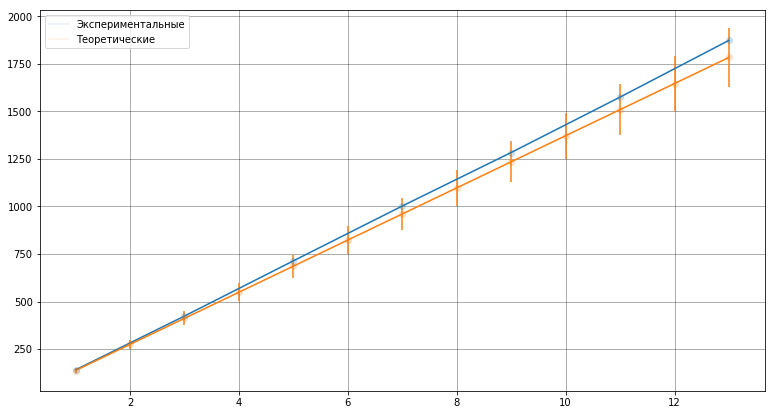

In [10]:
plt.figure(figsize=(13, 7))
grid_exper = np.arange(1, len(nu)+1, 2)
grid_theor = np.arange(1, len(nu)+1, 1)

ml.plt_pq(grid_exper, nu_exper, label='Экспериментальные')
ml.plt_pq(grid_theor, nu, label='Теоретические')
plt.show()